In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("AirfoilSelfNoise.csv")
data.head()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [3]:
#Rename the columns so that it will be more readable
df = data.rename(columns={"f": 'Frequency',
                          "alpha":'Angle of attack',"c":'Chord length',
                          " U_infinity":'Free-stream velocity',"delta":"Section side displacement thickness",
                          })
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Section side displacement thickness,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
df.isnull().sum()

Frequency                              0
Angle of attack                        0
Chord length                           0
Free-stream velocity                   0
Section side displacement thickness    0
SSPL                                   0
dtype: int64

In [5]:
df.describe()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Section side displacement thickness,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [6]:
# Assign data as features and target
X = df.filter(['Frequency','Angle of attack','Chord length','Free-stream velocity','Section side displacement thickness']) # based on input
Y_True = df.filter(['Scaled Sound Pressure Level']) # to predict
df.shape, X.shape, Y_True.shape

((1503, 6), (1503, 5), (1503, 0))

array([[<AxesSubplot:title={'center':'Frequency'}>,
        <AxesSubplot:title={'center':'Angle of attack'}>],
       [<AxesSubplot:title={'center':'Chord length'}>,
        <AxesSubplot:title={'center':'Free-stream velocity'}>],
       [<AxesSubplot:title={'center':'Section side displacement thickness'}>,
        <AxesSubplot:>]], dtype=object)

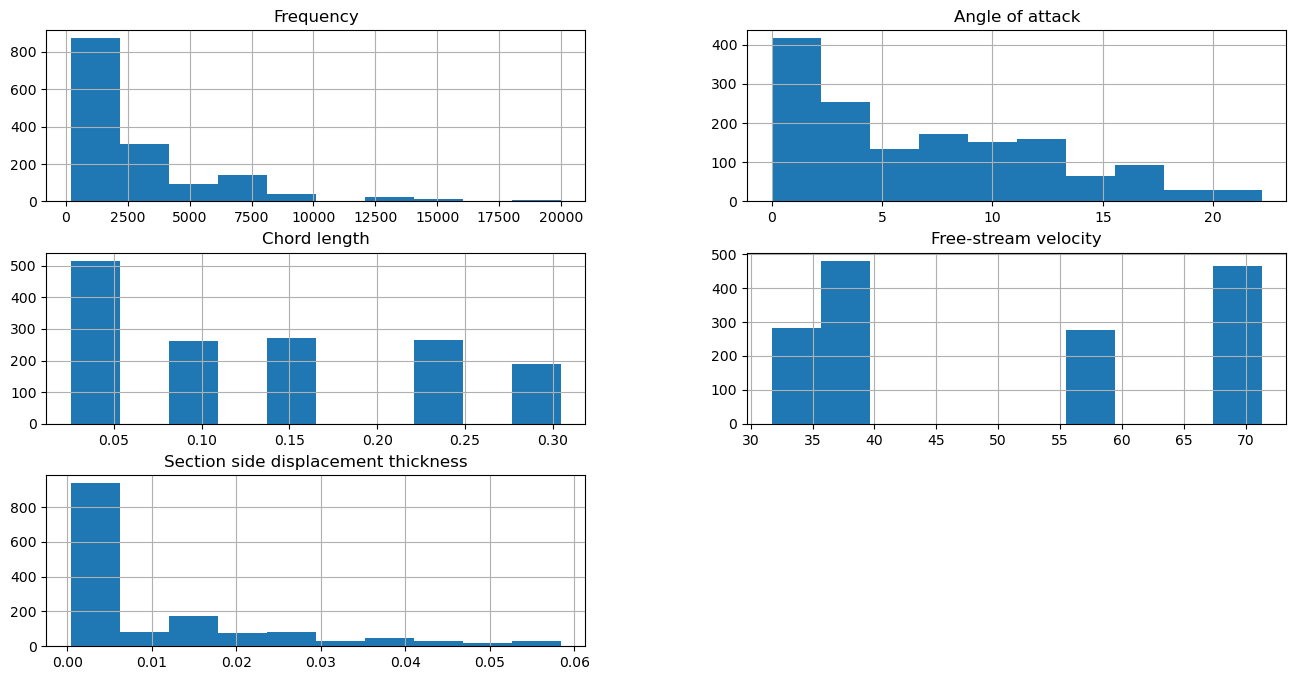

In [7]:
X.hist(figsize=(16, 8))

C:\Users\91881\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


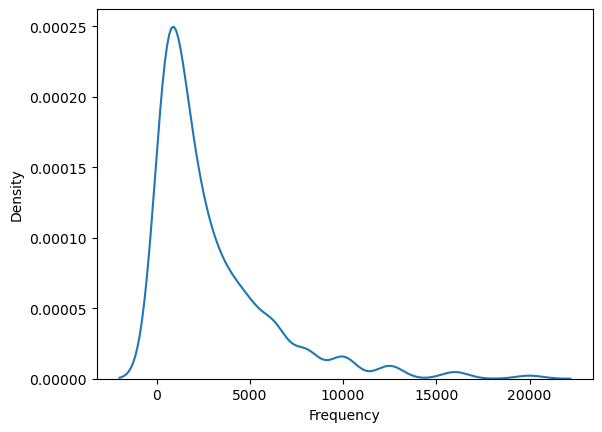

C:\Users\91881\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


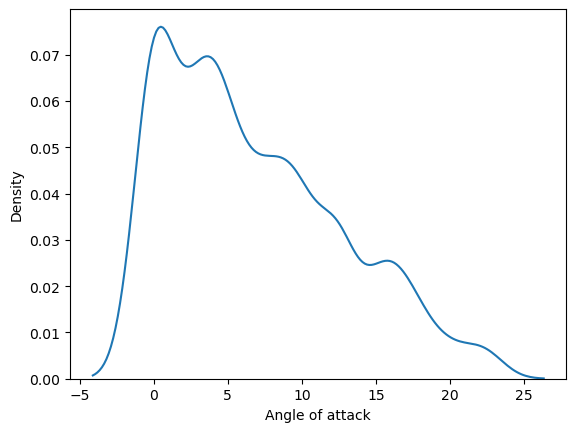

C:\Users\91881\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


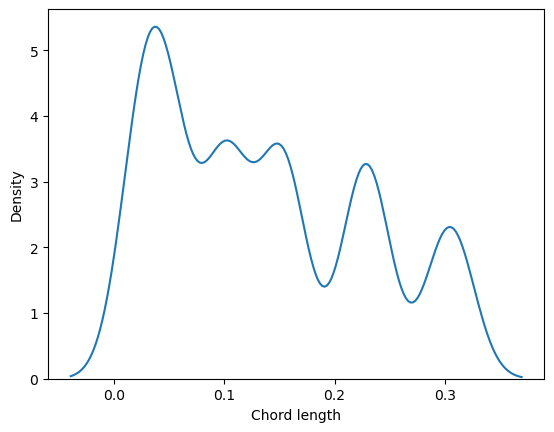

C:\Users\91881\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


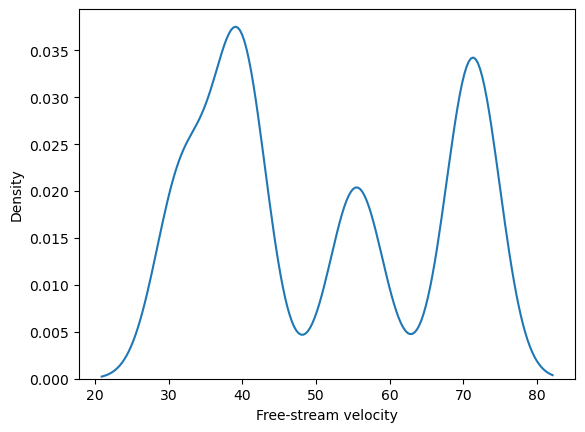

C:\Users\91881\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


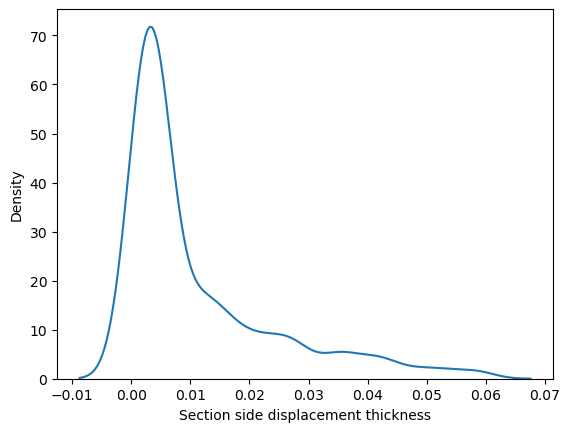

In [8]:
sns.distplot(a=df['Frequency'], hist=False)
plt.show()
sns.distplot(a=df['Angle of attack'], hist=False)
plt.show()
sns.distplot(a=df['Chord length'], hist=False)
plt.show()
sns.distplot(a=df['Free-stream velocity'], hist=False)
plt.show()
sns.distplot(a=df['Section side displacement thickness'], hist=False)
plt.show()


C:\Users\91881\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


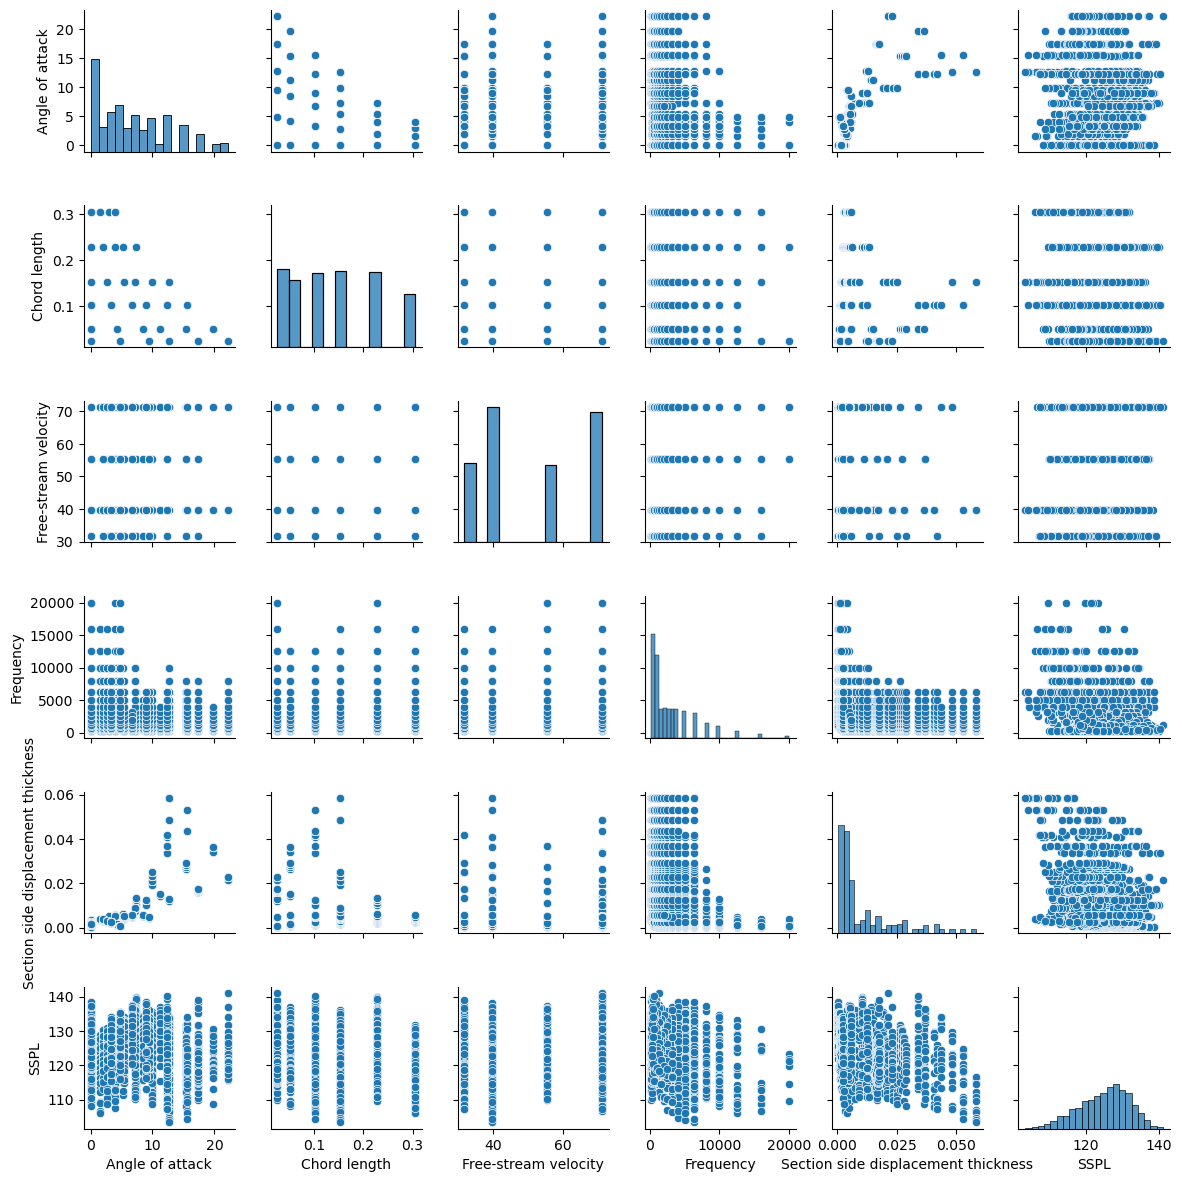

In [8]:
influential_features = ['Angle of attack', 'Chord length',"Free-stream velocity", 'Frequency', 'Section side displacement thickness',"SSPL"]
sns.pairplot(df[influential_features], size=2)

In [9]:
df[influential_features].corr()

,Angle of attack,Chord length,Free-stream velocity,Frequency,Section side displacement thickness,SSPL
Angle of attack,1.000000,-0.504868,0.058760,-0.272765,0.753394,-0.156108
Chord length,-0.504868,1.000000,0.003787,-0.003661,-0.220842,-0.236162
Free-stream velocity,0.058760,0.003787,1.000000,0.133664,-0.003974,0.125103
Frequency,-0.272765,-0.003661,0.133664,1.000000,-0.230107,-0.390711
Section side displacement thickness,0.753394,-0.220842,-0.003974,-0.230107,1.000000,-0.312670
SSPL,-0.156108,-0.236162,0.125103,-0.390711,-0.312670,1.000000


<AxesSubplot:>

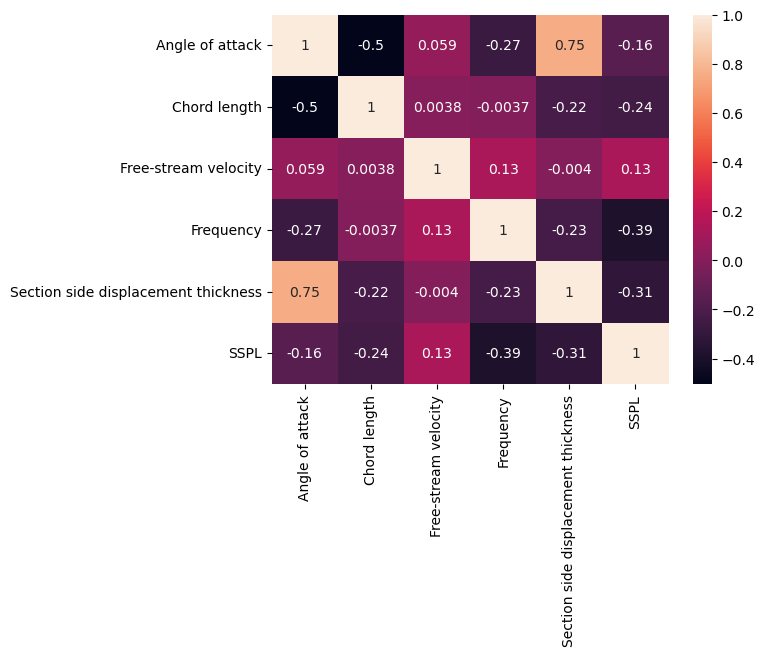

In [10]:
sns.heatmap(df[influential_features].corr(), annot=True)

In [11]:
df["Angle of attack"]=(df["Angle of attack"]-df["Angle of attack"].mean())/df["Angle of attack"].std()
df["Angle of attack"]

df["Frequency"]=(df["Frequency"]-df["Frequency"].mean())/df["Frequency"].std()
df["Frequency"]

df["Chord length"]=(df["Chord length"]-df["Chord length"].mean())/df["Chord length"].std()
df["Chord length"]

df["Free-stream velocity"]=(df["Free-stream velocity"]-df["Free-stream velocity"].mean())/df["Free-stream velocity"].std()
df["Free-stream velocity"]

df['Section side displacement thickness']=(df['Section side displacement thickness']-df['Section side displacement thickness'].mean())/df['Section side displacement thickness'].std()
df['Section side displacement thickness']


0      -0.644590
1      -0.644590
2      -0.644590
3      -0.644590
4      -0.644590
          ...   
1498    3.171717
1499    3.171717
1500    3.171717
1501    3.171717
1502    3.171717
Name: Section side displacement thickness, Length: 1503, dtype: float64

In [12]:
y=df["SSPL"]

X=df[['Angle of attack', 'Chord length',"Free-stream velocity", 'Frequency', 'Section side displacement thickness']]

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

for training dataset
mean absolute error:  3.7081365877320303
root mean square error:  4.777753015586844
R2 score:  0.5214416938715567
for testing dataset
mean squared error:  23.687858290026227
mean absolute error:  3.7761801748855017
root mean square error:  4.867017391588633
R2 score:  0.4982726587932882


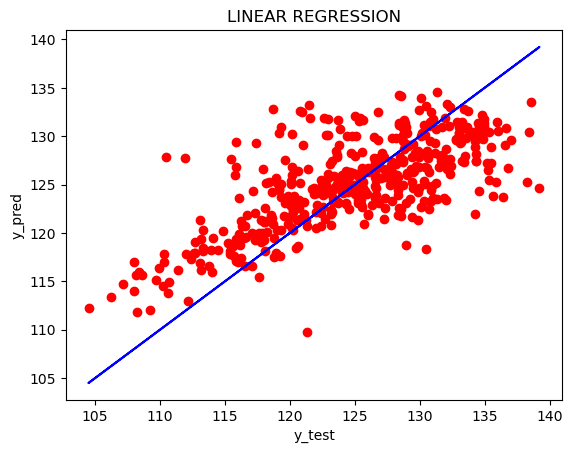

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

y_pred=model.predict(X_train)
rmse=np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
mae=mean_absolute_error(y_train, y_pred)

print("for training dataset")
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)


y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("for testing dataset")
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("LINEAR REGRESSION")
plt.show()


for training dataset
mean absolute error:  3.708895115973385
root mean square error:  4.777759518927192
R2 score:  0.5214403910709937
for testing dataset
mean squared error:  23.693612056892146
mean absolute error:  3.7773414502112113
root mean square error:  4.8676084535315844
R2 score:  0.4981507895167916


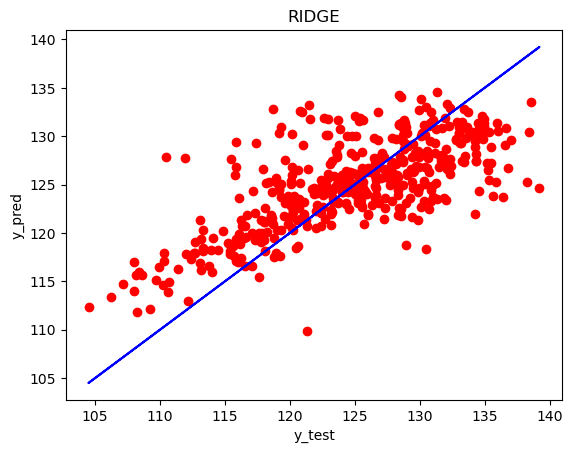

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(X_train, y_train)

y_pred=model.predict(X_train)
rmse=np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
mae=mean_absolute_error(y_train, y_pred)

print("for training dataset")
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("for testing dataset")
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("RIDGE")
plt.show()

for training dataset
mean absolute error:  4.42357885506766
root mean square error:  5.46245036954255
R2 score:  0.3744493551194593
for testing dataset
mean squared error:  31.589839150373525
mean absolute error:  4.581052539925471
root mean square error:  5.620483889343828
R2 score:  0.3309025319212575


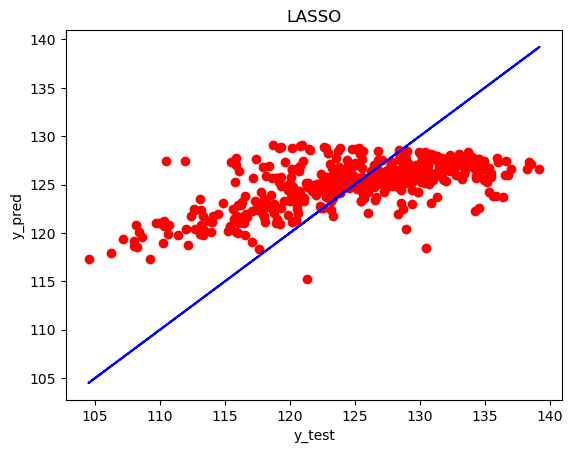

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn.linear_model import Lasso
model=Lasso()
model.fit(X_train, y_train)

y_pred=model.predict(X_train)
rmse=np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
mae=mean_absolute_error(y_train, y_pred)

print("for training dataset")
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("for testing dataset")
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("LASSO")
plt.show()

for training dataset
mean absolute error:  4.534443547300022
root mean square error:  5.571948495800758
R2 score:  0.34911890926939915
for testing dataset
mean squared error:  32.40881892958237
mean absolute error:  4.668036106025234
root mean square error:  5.692874399596602
R2 score:  0.3135559004912002


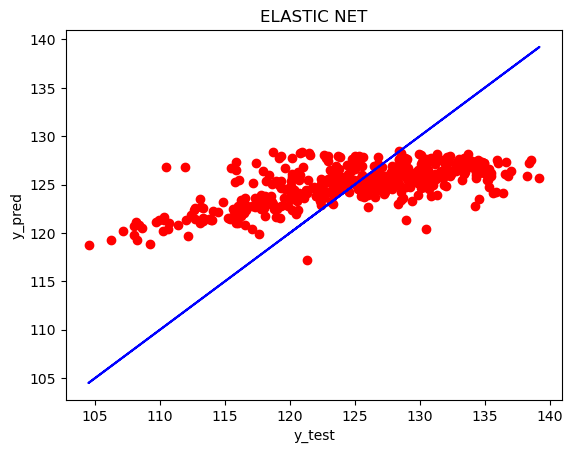

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn.linear_model import ElasticNet
model=ElasticNet()
model.fit(X_train, y_train)

y_pred=model.predict(X_train)
rmse=np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
mae=mean_absolute_error(y_train, y_pred)

print("for training dataset")
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("for testing dataset")
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("ELASTIC NET")
plt.show()

for training dataset
mean absolute error:  3.1588291109028823
root mean square error:  4.096911726899506
R2 score:  0.6481150592395087
for testing dataset
mean squared error:  17.82073049852066
mean absolute error:  3.15228275235706
root mean square error:  4.221460706736551
R2 score:  0.622543008240268


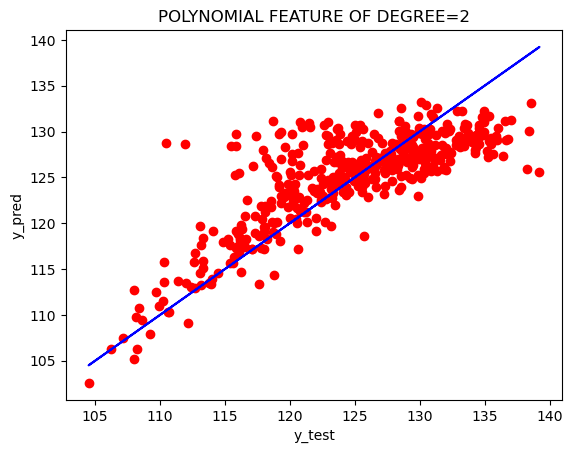

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
polynomial_features=PolynomialFeatures(degree=2)
X_train_poly=polynomial_features.fit_transform(X_train)
X_test_poly=polynomial_features.fit_transform(X_test)
model=LinearRegression()
model.fit(X_train_poly, y_train)

y_pred=model.predict(X_train_poly)
rmse=np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
mae=mean_absolute_error(y_train, y_pred)

print("for training dataset")
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)
y_pred=model.predict(X_test_poly)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("for testing dataset")
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("POLYNOMIAL FEATURE OF DEGREE=2")
plt.show()

for training dataset
mean absolute error:  2.5588264264796328
root mean square error:  3.346280518367342
R2 score:  0.7652464556917782
for testing dataset
mean squared error:  12.921311130697013
mean absolute error:  2.7148453947210824
root mean square error:  3.594622529654124
R2 score:  0.7263165373950687


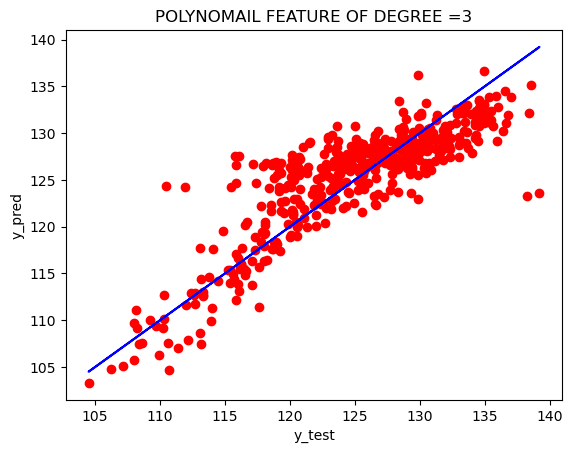

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
polynomial_features=PolynomialFeatures(degree=3)
X_train_poly=polynomial_features.fit_transform(X_train)
X_test_poly=polynomial_features.fit_transform(X_test)
model=LinearRegression()
model.fit(X_train_poly, y_train)

y_pred=model.predict(X_train_poly)
rmse=np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
mae=mean_absolute_error(y_train, y_pred)

print("for training dataset")
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)
y_pred=model.predict(X_test_poly)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("for testing dataset")
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("POLYNOMAIL FEATURE OF DEGREE =3")
plt.show()

for training dataset
mean absolute error:  1.9532244534271894
root mean square error:  2.5703989540928616
R2 score:  0.8614876366001598
for testing dataset
mean squared error:  8.56484712223041
mean absolute error:  2.1596326332307294
root mean square error:  2.9265760065698636
R2 score:  0.8185898479353888


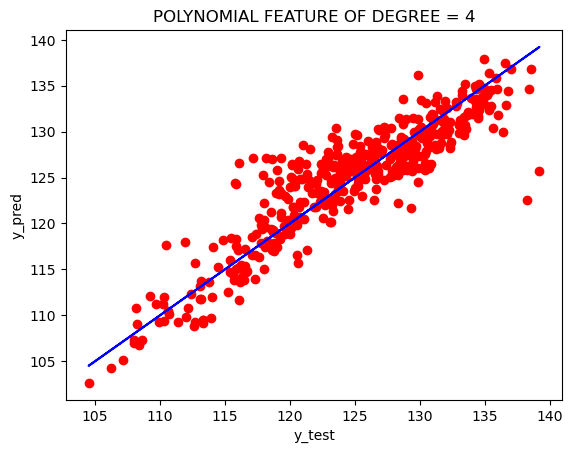

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn.preprocessing import PolynomialFeatures
polynomial_features=PolynomialFeatures(degree=4)
X_train_poly=polynomial_features.fit_transform(X_train)
X_test_poly=polynomial_features.fit_transform(X_test)
model=LinearRegression()
model.fit(X_train_poly, y_train)

y_pred=model.predict(X_train_poly)
rmse=np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
mae=mean_absolute_error(y_train, y_pred)

print("for training dataset")
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)
y_pred=model.predict(X_test_poly)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("for testing dataset")
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("POLYNOMIAL FEATURE OF DEGREE = 4")
plt.show()

for training dataset
mean absolute error:  0.0
root mean square error:  0.0
R2 score:  1.0
for testing dataset
mean squared error:  8.13958463414634
mean absolute error:  2.0177516629711745
root mean square error:  2.8529957297806003
R2 score:  0.8275972396062182


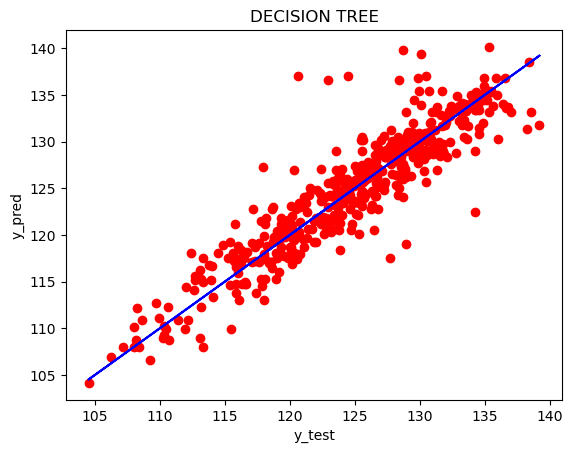

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)

y_pred=model.predict(X_train)
rmse=np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
mae=mean_absolute_error(y_train, y_pred)

print("for training dataset")
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("for testing dataset")
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("DECISION TREE")
plt.show()

for training dataset
mean absolute error:  0.48598694167570927
root mean square error:  0.680991253981079
R2 score:  0.9897950137942153
for testing dataset
mean squared error:  3.620193035887522
mean absolute error:  1.3638793035159846
root mean square error:  1.9026804870727827
R2 score:  0.9310384544687371


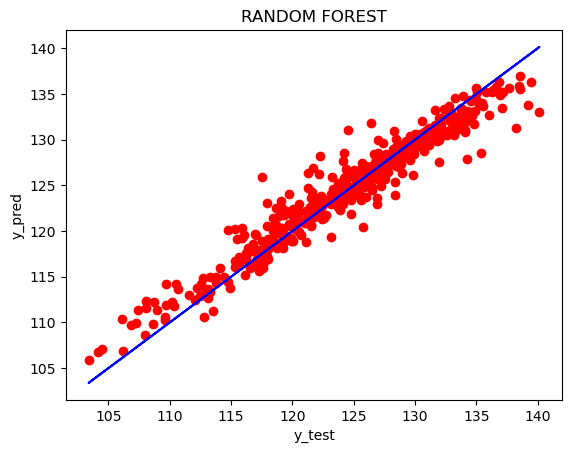

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=20, random_state=42, n_estimators=500)
model=model.fit(X_train, y_train)

y_pred=model.predict(X_train)
rmse=np.sqrt(mean_squared_error(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
mae=mean_absolute_error(y_train, y_pred)

print("for training dataset")
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)
y_pred=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("for testing dataset")
print("mean squared error: ", mse)
print("mean absolute error: ", mae)
print("root mean square error: ", rmse)
print("R2 score: ", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("RANDOM FOREST")
plt.show()

Mean Absolute Error (MAE): 2.1811781226903175
Mean Squared Error (MSE): 8.762136600640554
Root Mean Squared Error (RMSE): 2.960090640612303
R-squared (R²): 0.8144111026795351


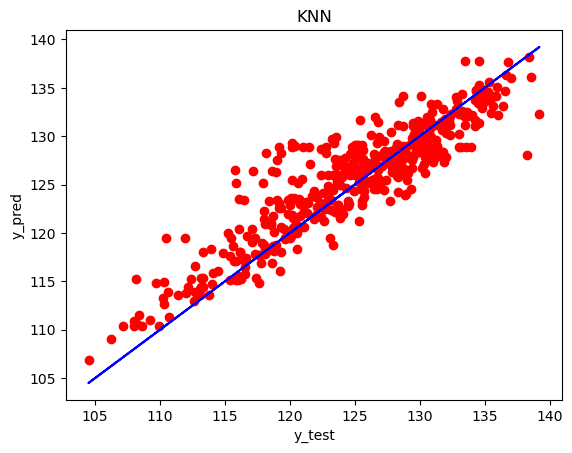

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
k=3
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("KNN")
plt.show()

Mean Absolute Error (MAE): 3.577731614394275
Mean Squared Error (MSE): 21.12086177634934
Root Mean Squared Error (RMSE): 4.595743876278283
R-squared (R²): 0.5526436500380428


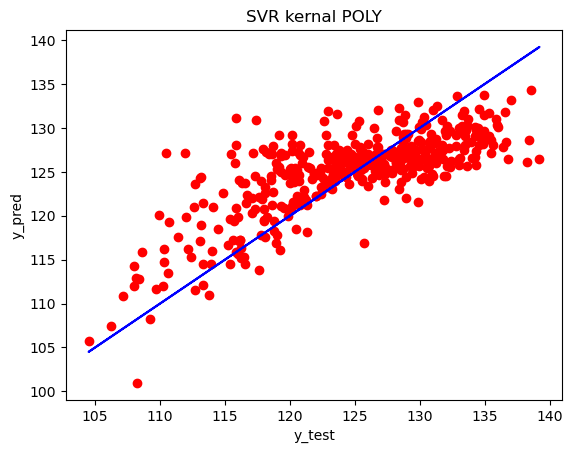

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn.svm import SVR
svr = SVR(kernel="poly")
svr.fit(X_train, y_train)
y_pred=svr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("SVR kernal POLY")
plt.show()


Mean Absolute Error (MAE): 2.957464676292156
Mean Squared Error (MSE): 15.796220817624224
Root Mean Squared Error (RMSE): 3.9744459761863946
R-squared (R²): 0.6654237046294007


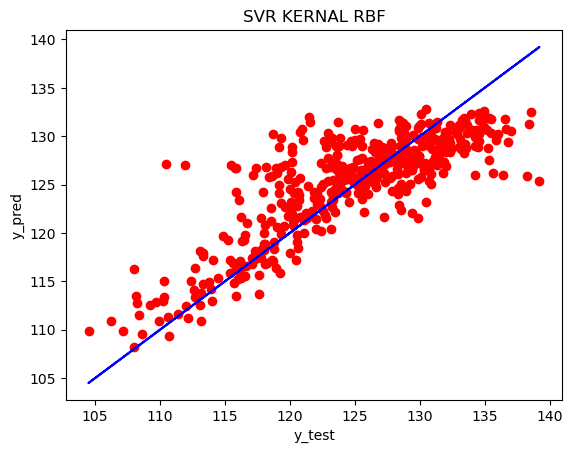

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)



from sklearn.svm import SVR
svr = SVR(kernel="rbf")
svr.fit(X_train, y_train)
y_pred=svr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("SVR KERNAL RBF")
plt.show()

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


Multi-Layer Perceptron (MLP) Results:
Mean Squared Error (MSE): 82.70180100101234
R-squared (R2): 0.7912501168987178
mean absolute error (MAE): 7.286667242578418


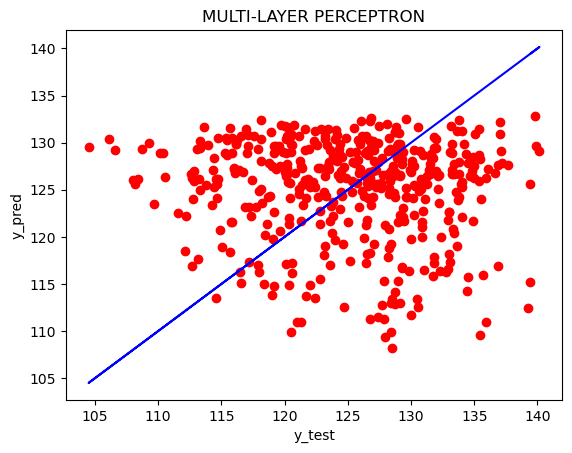

In [40]:
# Multi-Layer Perceptron (Neural Network)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

mlp = MLPRegressor(hidden_layer_sizes=(1000,500), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, y_pred)
mlp_r2 = r2_score(y_test, mlp_predictions)
mlp_mse=mean_squared_error(y_test, y_pred)
print("\nMulti-Layer Perceptron (MLP) Results:")
print(f"Mean Squared Error (MSE): {mlp_mse}")
print(f"R-squared (R2): {mlp_r2}")
print(f"mean absolute error (MAE): {mlp_mae}")

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("MULTI-LAYER PERCEPTRON")
plt.show()

Epoch 1/100
33/33 [==============================] - 3s 22ms/step - loss: 14836.8174 - val_loss: 13494.1475
Epoch 2/100
33/33 [==============================] - 0s 9ms/step - loss: 10914.1143 - val_loss: 7253.8081
Epoch 3/100
33/33 [==============================] - 0s 8ms/step - loss: 3754.0171 - val_loss: 1006.3187
Epoch 4/100
33/33 [==============================] - 0s 9ms/step - loss: 624.7102 - val_loss: 424.1713
Epoch 5/100
33/33 [==============================] - 0s 9ms/step - loss: 390.9638 - val_loss: 336.4471
Epoch 6/100
33/33 [==============================] - 0s 8ms/step - loss: 320.3373 - val_loss: 284.9019
Epoch 7/100
33/33 [==============================] - 0s 7ms/step - loss: 267.7246 - val_loss: 240.3738
Epoch 8/100
33/33 [==============================] - 0s 9ms/step - loss: 226.3916 - val_loss: 202.8926
Epoch 9/100
33/33 [==============================] - 0s 10ms/step - loss: 193.4510 - val_loss: 175.4812
Epoch 10/100
33/33 [==============================] - 0s 7ms/s

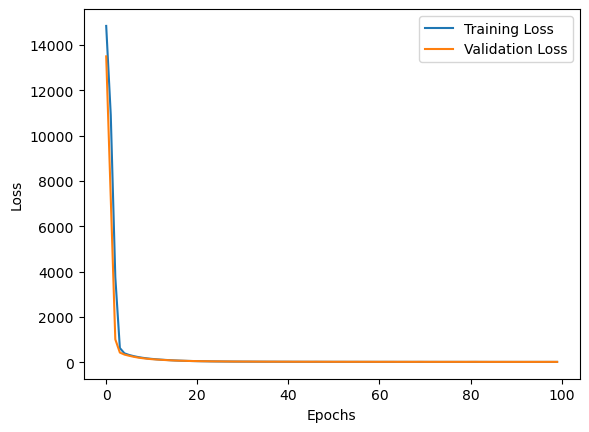

15/15 [==============================] - 0s 3ms/step
Mean Absolute Error (MAE): 2.681594993303726
Mean Squared Error (MSE): 13.140874627080406
Root Mean Squared Error (RMSE): 3.6250344311579172
R-squared (R²): 0.7216660110402706


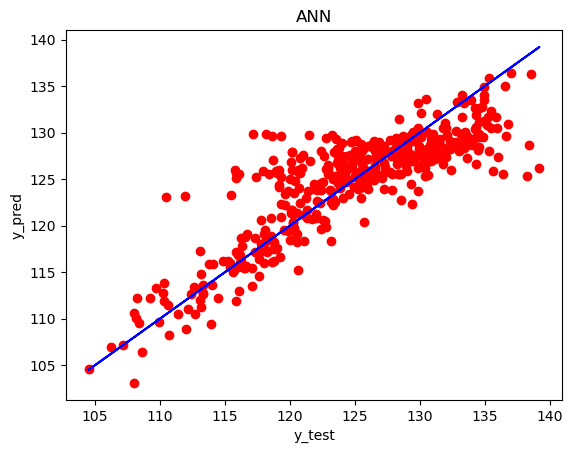

In [41]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


data = pd.read_csv('AirfoilSelfNoise.csv')

df = data.rename(columns={"f": 'Frequency',
                          "alpha":'Angle of attack',"c":'Chord length',
                          " U_infinity":'Free-stream velocity',"delta":"Section side displacement thickness",
                          })
df.head()
X = df.drop('SSPL', axis=1)  # Assuming 'Noise_Level' is the target column
y = data['SSPL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (1 output neuron)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (e.g., Mean Squared Error)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("ANN")
plt.show()

Mean Absolute Error (MAE): 1.2886223606016576
Mean Squared Error (MSE): 3.236086221545645
Root Mean Squared Error (RMSE): 1.7989125108091402
R-squared (R²): 0.9314571661155453


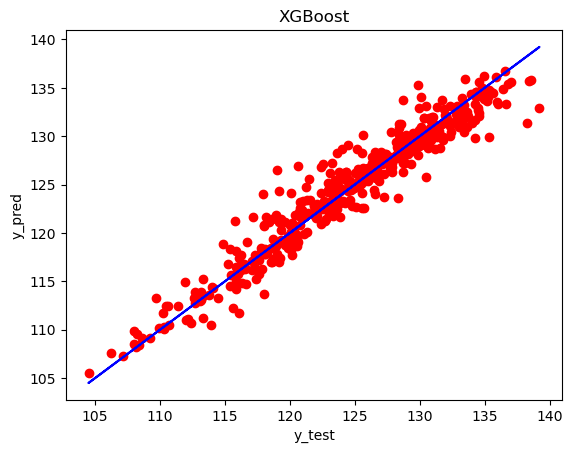

In [42]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data = pd.read_csv('AirfoilSelfNoise.csv')

df = data.rename(columns={"f": 'Frequency',
                          "alpha":'Angle of attack',"c":'Chord length',
                          " U_infinity":'Free-stream velocity',"delta":"Section side displacement thickness",
                          })
df.head()
X = df.drop('SSPL', axis=1)  # Assuming 'Noise_Level' is the target column
y = data['SSPL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Create an XGBoost regression model
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression tasks
    n_estimators=100,             # Number of boosting rounds (you can adjust this)
    learning_rate=0.1,            # Learning rate (you can adjust this)
    max_depth=6                   # Maximum depth of trees (you can adjust this)
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("XGBoost")
plt.show()

0:	learn: 6.5907029	test: 6.5748147	best: 6.5748147 (0)	total: 125ms	remaining: 2m 4s
200:	learn: 1.2339296	test: 1.7269242	best: 1.7269242 (200)	total: 628ms	remaining: 2.5s
400:	learn: 0.8694735	test: 1.5016947	best: 1.5016947 (400)	total: 1.05s	remaining: 1.56s
600:	learn: 0.6739381	test: 1.4035175	best: 1.4035175 (600)	total: 1.4s	remaining: 930ms
800:	learn: 0.5518015	test: 1.3404315	best: 1.3404315 (800)	total: 2.1s	remaining: 522ms
999:	learn: 0.4632672	test: 1.2978111	best: 1.2978111 (999)	total: 2.66s	remaining: 0us

bestTest = 1.297811073
bestIteration = 999

Mean Absolute Error (MAE): 0.9083352484957519
Mean Squared Error (MSE): 1.6843139963044877
Root Mean Squared Error (RMSE): 1.2978112329242986
R-squared (R²): 0.9643249139379174


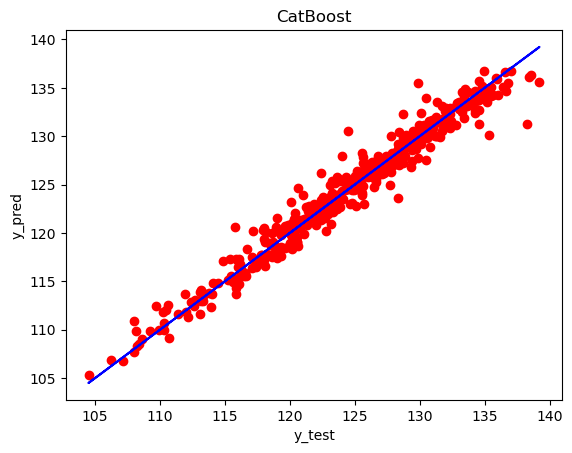

In [43]:
# Import necessary libraries
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.read_csv('AirfoilSelfNoise.csv')

df = data.rename(columns={"f": 'Frequency',
                          "alpha":'Angle of attack',"c":'Chord length',
                          " U_infinity":'Free-stream velocity',"delta":"Section side displacement thickness",
                          })
df.head()
X = df.drop('SSPL', axis=1)  # Assuming 'Noise_Level' is the target column
y = data['SSPL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Create a CatBoost regression model
model = CatBoostRegressor(
    iterations=1000,             
    learning_rate=0.1,           
    depth=6,                     
    loss_function='RMSE',         
    verbose=200                   
)


model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=70, verbose_eval=200)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("CatBoost")
plt.show()

Mean Absolute Error (MAE): 0.8523569959255505
Mean Squared Error (MSE): 1.5932511023610474
Root Mean Squared Error (RMSE): 1.2622405089209614
R-squared (R²): 0.9662536971610114


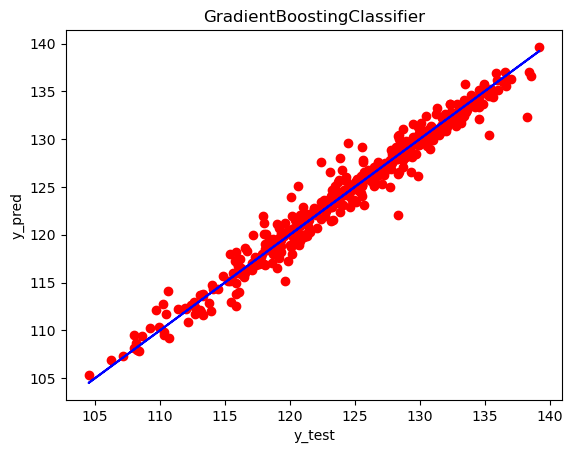

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor

 


data = pd.read_csv('AirfoilSelfNoise.csv')

df = data.rename(columns={"f": 'Frequency',
                          "alpha":'Angle of attack',"c":'Chord length',
                          " U_infinity":'Free-stream velocity',"delta":"Section side displacement thickness",
                          })
df.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


y=df["SSPL"]

X=df[['Angle of attack', 'Chord length',"Free-stream velocity", 'Frequency', 'Section side displacement thickness']]


from sklearn.ensemble import GradientBoostingClassifier


# Create and train a Stochastic Gradient Tree Boosting classifier
sgtb_regressor = GradientBoostingRegressor(subsample=0.8, n_estimators=60990, random_state=42)
sgtb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgtb_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred, c="r")
plt.plot(y_test, y_test, c="blue")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("GradientBoostingClassifier")

plt.show()

In [42]:
freq = input("Enter the frequency value   :   ")
angle_of_attack = input("Enter the angle of attack value   :   ")
chord_length = input("Enter the chord length value   :   ")
free_stream_velocity = input("Enter the free stream velocity temp  :  ")
suction_side_thickness= input("Enter the suction side thickness value   :   ")

from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=20, random_state=42, n_estimators=500)
model=model.fit(X_train, y_train)
output= model.predict([[float(freq),float(angle_of_attack),float(chord_length),float(free_stream_velocity),float(suction_side_thickness)]])
print('predicted SSPL is :',output)

Enter the frequency value   :   800
Enter the angle of attack value   :   0.0
Enter the chord length value   :   0.3048
Enter the free stream velocity temp  :  71
Enter the suction side thickness value   :   0.002663
predicted SSPL is : [126.382096]


C:\Users\91881\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [32]:
# Import necessary libraries
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = pd.read_csv('AirfoilSelfNoise.csv')

df = data.rename(columns={"f": 'Frequency',
                          "alpha":'Angle of attack',"c":'Chord length',
                          " U_infinity":'Free-stream velocity',"delta":"Section side displacement thickness",
                          })
df.head()
X = df.drop('SSPL', axis=1)  # Assuming 'Noise_Level' is the target column
y = data['SSPL']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoost regression model
model = CatBoostRegressor(
    iterations=1000,             
    learning_rate=0.1,           
    depth=6,                     
    loss_function='RMSE',         
    verbose=200                   
)

freq = input("Enter the frequency value   :   ")
angle_of_attack = input("Enter the angle of attack value   :   ")
chord_length = input("Enter the chord length value   :   ")
free_stream_velocity = input("Enter the free stream velocity temp  :  ")
suction_side_thickness= input("Enter the suction side thickness value   :   ")
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=70, verbose_eval=200)
output= model.predict([[float(freq),float(angle_of_attack),float(chord_length),float(free_stream_velocity),float(suction_side_thickness)]])
print('predicted SSPL is :',output)

Enter the frequency value   :   800
Enter the angle of attack value   :   0.0
Enter the chord length value   :   0.2
Enter the free stream velocity temp  :  71
Enter the suction side thickness value   :   0.02663
0:	learn: 6.5347229	test: 6.7655375	best: 6.7655375 (0)	total: 2.72ms	remaining: 2.72s
200:	learn: 1.2251663	test: 1.7431744	best: 1.7431744 (200)	total: 348ms	remaining: 1.38s
400:	learn: 0.8721731	test: 1.5581507	best: 1.5574887 (394)	total: 697ms	remaining: 1.04s
600:	learn: 0.6882377	test: 1.4769375	best: 1.4769375 (600)	total: 1.06s	remaining: 703ms
800:	learn: 0.5645430	test: 1.4246000	best: 1.4239307 (797)	total: 1.39s	remaining: 345ms
999:	learn: 0.4778963	test: 1.3920455	best: 1.3920364 (998)	total: 1.73s	remaining: 0us

bestTest = 1.392036419
bestIteration = 998

Shrink model to first 999 iterations.
predicted SSPL is : [126.89188755]
